## Final Project Submission

Please fill out:
* Student name: GROUP 7
* Members:  Maureen Kariuki, Aisha Mbarak, MariaCharlote Mbiyu, Jared Kiprotich, Lee Kamaita, Samuel Lumumba,  Edward Opollo
* Student pace: part time  
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


## Introduction

## Project Overview

As research consultants, our objective is to provide valuable insights and comprehensive information to support our stakeholder: **The National Association of Realtors (NAR)**, in advising their clients, including homeowners and property owners, about the impact of various factors on home sale prices in the county.

The project primarily employs multiple linear regression modeling to analyze house sales in a northwestern county.

The outcomes of this project will yield actionable insights that can greatly benefit members of the NAR in the following ways:

1. Facilitating sales growth: The insights gained from the model will help identify key factors influencing home sale prices, enabling NAR members to develop strategies to enhance sales performance.

2. Informing policy implementation: By understanding how different factors impact home prices, NAR can implement effective policies that support homeowners and promote a healthy real estate market.

3. Ensuring long-term customer satisfaction: The insights obtained will enable NAR members to provide informed guidance to homeowners, ensuring their satisfaction and long-term success in real estate transactions.

Ultimately, the model created through this project will empower property buyers and sellers to make well-informed decisions by considering the various factors influencing home sale prices.

## Business Problem

To initiate the project, the following business problems have been formulated for analysis:

Q1. To determine Property Valuation by considering the impact of various property attributes 

Q2. To identify the most influential features in determining property prices

Q3. To evaluate potential real estate investment opportunities thus assessing profitability and potential ROI



## Data Understanding

This project uses the King County House Sales dataset, which can be found in kc_house_data.csv which is part of this submission.
The data contains information about house sales in a northwestern county.

It includes the below features to name a few :

 * price 
 * bedrooms
 * bathrooms
 * sqft_living
 * Zipcode
 * Yr built

In [1]:
#import necessary Libraries
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('seaborn')

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
#load the data
df_housing = pd.read_csv('data/kc_house_data.csv')

#set the display format for float numbers to show 2 decimal places
pd.options.display.float_format = '{:.2f}'.format

#display the header details of df
df_housing.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.00,3,1.00,1180,5650,1.00,NaN,NONE,...,7 Average,1180,0.0,1955,0.00,98178,47.51,-122.26,1340,5650
1,6414100192,12/9/2014,538000.00,3,2.25,2570,7242,2.00,NO,NONE,...,7 Average,2170,400.0,1951,1991.00,98125,47.72,-122.32,1690,7639
2,5631500400,2/25/2015,180000.00,2,1.00,770,10000,1.00,NO,NONE,...,6 Low Average,770,0.0,1933,nan,98028,47.74,-122.23,2720,8062
3,2487200875,12/9/2014,604000.00,4,3.00,1960,5000,1.00,NO,NONE,...,7 Average,1050,910.0,1965,0.00,98136,47.52,-122.39,1360,5000
4,1954400510,2/18/2015,510000.00,3,2.00,1680,8080,1.00,NO,NONE,...,8 Good,1680,0.0,1987,0.00,98074,47.62,-122.05,1800,7503


In [3]:
#display the tail details of df
df_housing.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21592,263000018,5/21/2014,360000.00,3,2.50,1530,1131,3.00,NO,NONE,...,8 Good,1530,0.0,2009,0.00,98103,47.70,-122.35,1530,1509
21593,6600060120,2/23/2015,400000.00,4,2.50,2310,5813,2.00,NO,NONE,...,8 Good,2310,0.0,2014,0.00,98146,47.51,-122.36,1830,7200
21594,1523300141,6/23/2014,402101.00,2,0.75,1020,1350,2.00,NO,NONE,...,7 Average,1020,0.0,2009,0.00,98144,47.59,-122.30,1020,2007
21595,291310100,1/16/2015,400000.00,3,2.50,1600,2388,2.00,NaN,NONE,...,8 Good,1600,0.0,2004,0.00,98027,47.53,-122.07,1410,1287
21596,1523300157,10/15/2014,325000.00,2,0.75,1020,1076,2.00,NO,NONE,...,7 Average,1020,0.0,2008,0.00,98144,47.59,-122.30,1020,1357


In [4]:
df_housing.shape

(21597, 21)

In [5]:
#print columns in df
print(df_housing.columns)

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [6]:
#summary of dataframe
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

##### Short Explanation on the data.

* This is a Pandas Dataframe with 21597 rows and 21 columns.
* The data types in the data frame are  6 floats, 9 intergers (both numerical figures) and 6 objects(categorical figures 
* Missing values can be identified by taking number of entries minus the non null count per column. 
* The available columns are as follows: 'id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living','sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade','sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode','lat', 'long', 'sqft_living15', 'sqft_lot15
* The Memory usage for this dataFrame is 3.5+ KB
    

### Data Cleaning and Preparation 

To clean the data in preparation for analysis, we start with :

1. Check duplicates in the 'id' column.
2. Drop duplicates if necessary. 
3. Identify and handle NAN (Not a Number) /missing values.
3. Check for place holders in 'price'column i.e 0.00
4. Convert data date types if necessary.
5. Identify outliers and either drop / keep them depending on the study objective.
6. Feature Engineering by creating new columns ie 'is_renovated'.
7. Determining columns that are irrelevant for the analysis and drop them.


##### Dealing with duplicates

The id column is a unique identifier for a house thus should not have any duplicates.

In [7]:
#check Duplicates in id column
duplicates_id = df_housing.duplicated(subset ='id')

print(f"""
      We have a total of {duplicates_id.sum()} duplicates out of {df_housing.shape[0]} entries
      """)


      We have a total of 177 duplicates out of 21597 entries
      


In [8]:
duplicates_id.sample(10)

6699     False
708      False
17373    False
8750     False
10128    False
16180    False
3885     False
13702    False
17287    False
15881    False
dtype: bool

In [9]:
#drop the duplicate rows
#True is added to ensure the change is carried forward when the data is called again.
df_housing.drop_duplicates(subset='id',inplace = True)

#reconfirm duplicates have been removed
duplicates_id2 = df_housing.duplicated(subset ='id')
duplicates_id2.sum()

0

In [10]:
#drop id column to avoid it from appearing on the outliers boxplot
df_housing.drop("id", axis=1,inplace= True)

##### Converting dates to pd.datetime

In [11]:
# convert date, yr_built, yr_renovated
df_housing['date'] = pd.to_datetime(df_housing['date'])


In [12]:
#confirm the data type 
print(df_housing['date'].dtype)



datetime64[ns]


##### Checking for Placeholders

In [13]:
# Check placeholders in price 
# Check unique values in the price column
unique_prices = df_housing['price'].unique()

#sort the unique values in ascending order
sorted_prices = sorted(unique_prices)
sorted_prices[0]

78000.0

In [14]:
df_housing['price'].describe()

count     21420.00
mean     540739.30
std      367931.11
min       78000.00
25%      322500.00
50%      450000.00
75%      645000.00
max     7700000.00
Name: price, dtype: float64

* No place holders were identified in the price column.
* The minimum price is 78,000
* The maximum price is 7,700,000 . This figure sounds more as an outlier considering the distribution of the data and mean figures.

In [15]:
#identify unique values
df_housing['bedrooms'].unique()

array([ 3,  2,  4,  5,  1,  6,  7,  8,  9, 11, 10, 33], dtype=int64)

In [16]:
#identify unique values in bathrooms

df_housing['bathrooms'].unique()

array([1.  , 2.25, 3.  , 2.  , 4.5 , 1.5 , 2.5 , 1.75, 2.75, 3.25, 4.  ,
       3.5 , 0.75, 4.75, 5.  , 4.25, 3.75, 1.25, 5.25, 6.  , 0.5 , 5.5 ,
       6.75, 5.75, 8.  , 7.5 , 7.75, 6.25, 6.5 ])

In [17]:
#identify Nans
df_housing['sqft_living'].isna().sum()

0

In [18]:
#check a sample
df_housing['sqft_living'].sample()

6192    1050
Name: sqft_living, dtype: int64

In [19]:
df_housing['sqft_living'].describe()

count   21420.00
mean     2083.13
std       918.81
min       370.00
25%      1430.00
50%      1920.00
75%      2550.00
max     13540.00
Name: sqft_living, dtype: float64

In [20]:
#Map condition column to numerical codes
condition_mapping = {'Poor': 1, 'Fair': 2, 'Average': 3, 'Good': 4, 'Very Good': 5}
df_housing['condition'] = df_housing['condition'].map(condition_mapping)


In [21]:
#check count of each condition
df_housing['condition'].value_counts()

3    13900
4     5643
5     1687
2      162
1       28
Name: condition, dtype: int64

##### Dealing with Missing Values

In [22]:
#check number of missing figures
df_housing['yr_renovated'].isna().sum()

3804

In [23]:
#check percentage of missing figures
df_housing['yr_renovated'].isna().mean()*100

17.759103641456583

In [24]:
# Drop NaN values in column 'yr_renovated'
df_housing.dropna(subset=['yr_renovated'], inplace=True)

##### Create new columns 'is_renovated' 

A new column is added to our dataframe. The column is called "is_renovated where the intended answer is yes or no. 
However, 'yes' will be represented by 1 and 'no' by 0

In [25]:
# Create a new column 'is_renovated' based on the values
df_housing['is_renovated'] = df_housing['yr_renovated'].apply(lambda x: 1 if x != 0 and isinstance(x, float) else 0)


In [26]:
#confirm the number of yes(1) and No(0)
df_housing['is_renovated'].value_counts()

0    16876
1      740
Name: is_renovated, dtype: int64

In [27]:
# Print the modified dataframe
df_housing.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,is_renovated
0,2014-10-13,221900.00,3,1.00,1180,5650,1.00,NaN,NONE,3,...,1180,0.0,1955,0.00,98178,47.51,-122.26,1340,5650,0
1,2014-12-09,538000.00,3,2.25,2570,7242,2.00,NO,NONE,3,...,2170,400.0,1951,1991.00,98125,47.72,-122.32,1690,7639,1
3,2014-12-09,604000.00,4,3.00,1960,5000,1.00,NO,NONE,5,...,1050,910.0,1965,0.00,98136,47.52,-122.39,1360,5000,0
4,2015-02-18,510000.00,3,2.00,1680,8080,1.00,NO,NONE,3,...,1680,0.0,1987,0.00,98074,47.62,-122.05,1800,7503,0
5,2014-05-12,1230000.00,4,4.50,5420,101930,1.00,NO,NONE,3,...,3890,1530.0,2001,0.00,98053,47.66,-122.00,4760,101930,0


##### Identify Outliers in the columns

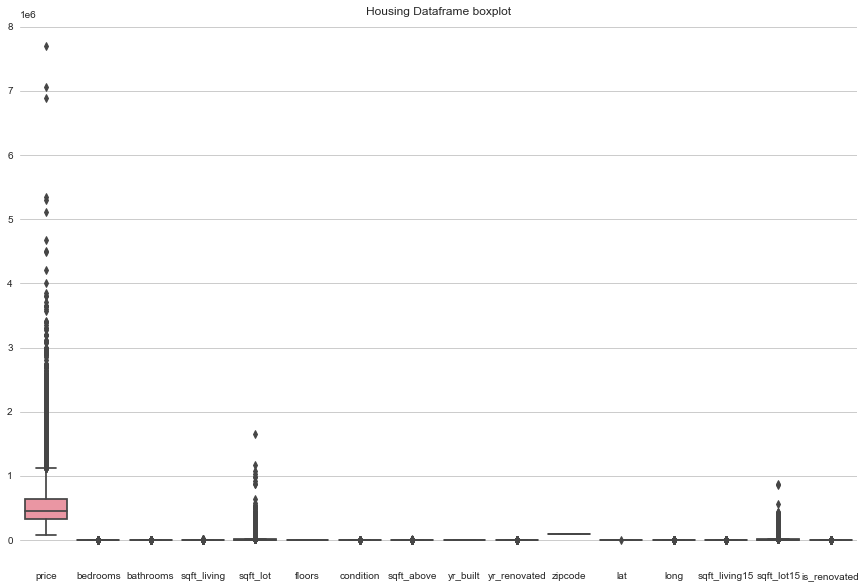

In [28]:
# Lets check for outliers. Lets plot our boxplot
# using seaborn
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data = df_housing, ax=ax)

# Set the plot title
plt.title('Housing Dataframe boxplot')

# Show the plot
plt.show();

In [29]:
# Checking the shape before the change
print(f'Before dropping outliers: {df_housing.shape}')

# Dropping outliers
df_housing = df_housing.loc[df_housing['price'] < 4_500_000]
df_housing = df_housing.loc[df_housing['bedrooms']< 33]

# Confirming the changes done
print(f'After dropping outliers: {df_housing.shape}')

Before dropping outliers: (17616, 21)
After dropping outliers: (17607, 21)


* The price column has outliers which we can handle . On dropping figures above 4.5 Million USD we realise we only lose 8 entries which should not have a huge impact on our data.
* The bedrooms columns has one outlier with 33 rooms. 


##### Dropping columns

The dataframe has columns that may not be useful in our evaluation. we have determined the following columns to be dropped based on low correlation with price.

'lat','long','zipcode', 'view','floors', 'sqft_basement','waterfront','sqft_lot15','sqft_lot'

In [30]:
#check correration of the columns with price
df_housing.corr()['price']

price            1.00
bedrooms         0.32
bathrooms        0.52
sqft_living      0.70
sqft_lot         0.09
floors           0.26
condition        0.03
sqft_above       0.60
yr_built         0.05
yr_renovated     0.12
zipcode         -0.05
lat              0.32
long             0.02
sqft_living15    0.60
sqft_lot15       0.08
is_renovated     0.12
Name: price, dtype: float64

In [31]:
# Columns to drop
columns_to_drop = ['lat','long','zipcode', 'view','floors', 'sqft_basement','waterfront','sqft_lot15','sqft_lot']

# Drop columns we are not using in our analysis
df_housing = df_housing.drop(columns=columns_to_drop)

In [32]:
#display summary of cleaned pandas df
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17607 entries, 0 to 21596
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           17607 non-null  datetime64[ns]
 1   price          17607 non-null  float64       
 2   bedrooms       17607 non-null  int64         
 3   bathrooms      17607 non-null  float64       
 4   sqft_living    17607 non-null  int64         
 5   condition      17607 non-null  int64         
 6   grade          17607 non-null  object        
 7   sqft_above     17607 non-null  int64         
 8   yr_built       17607 non-null  int64         
 9   yr_renovated   17607 non-null  float64       
 10  sqft_living15  17607 non-null  int64         
 11  is_renovated   17607 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(7), object(1)
memory usage: 1.7+ MB


###### short explanation of the cleaned dataframe

* The cleaned DataFrame has 17,608 rows and 12 columns.
* The columns are 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'condition', 'grade', 'sqft_above', 'yr_built', 'yr_renovated', 'sqft_living15', 'is_renovated'.
* The 'date' column has a datetime64 data type.
* The 'price', 'bathrooms', 'yr_renovated', and 'grade' columns have float64 data type.
* The 'bedrooms', 'sqft_living', 'condition', 'sqft_above', 'yr_built', 'sqft_living15', 'is_renovated' columns have int64 data type.
* The total memory usage of the DataFrame is approximately 1.7+ MB.


## Exploratory Data Analysis

In this step we perform statistical and visualization techniques in order to uncover patterns, relationships, and insights within the data. 

* Both Univariate and Bivariate analysis are covered in this section. 
* We utilise df/describe() and also visualise the columns.
* The output  gives a good idea of the central tendancy, variability and range of the variable we are looking into.

The analysis is done on 5 columns 
  * Price 
  * Bedrooms
  * Bathrooms
  * sqft_Living
  * Grade
  * Condition


In [33]:
df_housing['price'].describe()

count     17607.00
mean     538631.50
std      351470.83
min       80000.00
25%      322000.00
50%      450000.00
75%      645000.00
max     4490000.00
Name: price, dtype: float64

* The average or typical price of houses is around USD 538,631 with a standard deviation of USD 351,561.68 which can be considered as a large a deviation from the average price. 
This means a greater variability can be observed. 
* House prices in the northwestern county, mainly range from USD 322,000 to USD 645,000 with a possibility of a maximum price upto USD 4 490 000. 

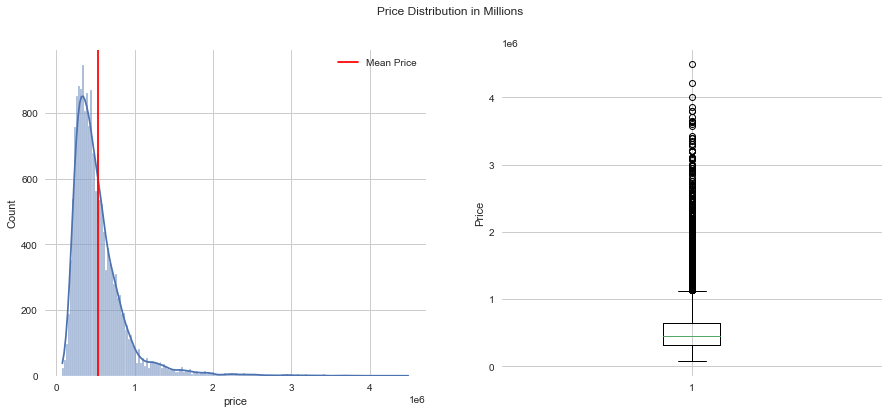

In [34]:
#create a histogram with a KDE curve / boxplot

fig, ax = plt.subplots(figsize=(15,6), ncols=2)

sns.histplot(df_housing.price, kde=True, ax=ax[0])
ax[0].axvline(df_housing['price'].mean(), color='red', label="Mean Price")


# Boxplot
ax[1].boxplot(df_housing['price'])
ax[1].set_ylabel("Price")
ax[0].legend()

# Title and showing
fig.suptitle("Price Distribution in Millions")
plt.show()

In [35]:
df_housing.describe()

,price,bedrooms,bathrooms,sqft_living,condition,sqft_above,yr_built,yr_renovated,sqft_living15,is_renovated
count,17607.00,17607.00,17607.00,17607.00,17607.00,17607.00,17607.00,17607.00,17607.00,17607.00
mean,538631.50,3.38,2.12,2083.47,3.41,1791.64,1971.20,83.55,1990.52,0.04
std,351470.83,0.90,0.76,906.00,0.65,820.38,29.36,399.75,683.96,0.20
min,80000.00,1.00,0.50,370.00,1.00,370.00,1900.00,0.00,399.00,0.00
25%,322000.00,3.00,1.75,1430.00,3.00,1200.00,1952.00,0.00,1490.00,0.00
50%,450000.00,3.00,2.25,1920.00,3.00,1570.00,1975.00,0.00,1847.00,0.00
75%,645000.00,4.00,2.50,2550.00,4.00,2220.00,1997.00,0.00,2370.00,0.00
max,4490000.00,11.00,8.00,13540.00,5.00,9410.00,2015.00,2015.00,6210.00,1.00


#### Summary of Univariate Analysis:
1. Bedrooms:
   - On average, the houses in the dataset have approximately 3.4 bedrooms.
   - The house with the fewest bedrooms in the dataset has 1 bedroom.
   - Most houses have either 3 or 4 bedrooms.
   - The house with the most bedrooms in the dataset has 11 bedrooms.

2. Bathrooms:
   - On average, the houses in the dataset have around 2.12 bathrooms.
   - The house with the fewest bathrooms in the dataset has 0.5 bathrooms.
   - Most houses have either 1.75, 2.25, or 2.5 bathrooms.
   - The house with the most bathrooms in the dataset has 8 bathrooms.

3. Living Area:
   - The average size of the living area in the houses is about 2,083.45 square feet.
   - The house with the smallest living area in the dataset is 370 square feet and the largest living area is 13,540 square feet.
  
4. Condition:
   - On average, the houses have a condition rating of 3.41, which indicates the overall state of the house.
   - The lowest condition rating in the dataset has a rating of 1, which indicates a poorer condition.
   - it should be noted, most houses have a condition rating of either 3 or 4.
   - The house with the highest condition rating in the dataset has a rating of 5, which indicates a better condition.

5. Above Ground Living Area:
   - The average size of the above ground living area is about 1,791.59 square feet.
   - The house with the smallest above ground living area in the dataset is 370 square feet and largest is 9810 square feet.
   
6. Yr Built:   
   - On average, the houses in the dataset were built around the year 1971.
   - The oldest house in the dataset was built in the year 1900 while the most recent house was built in the year 2015


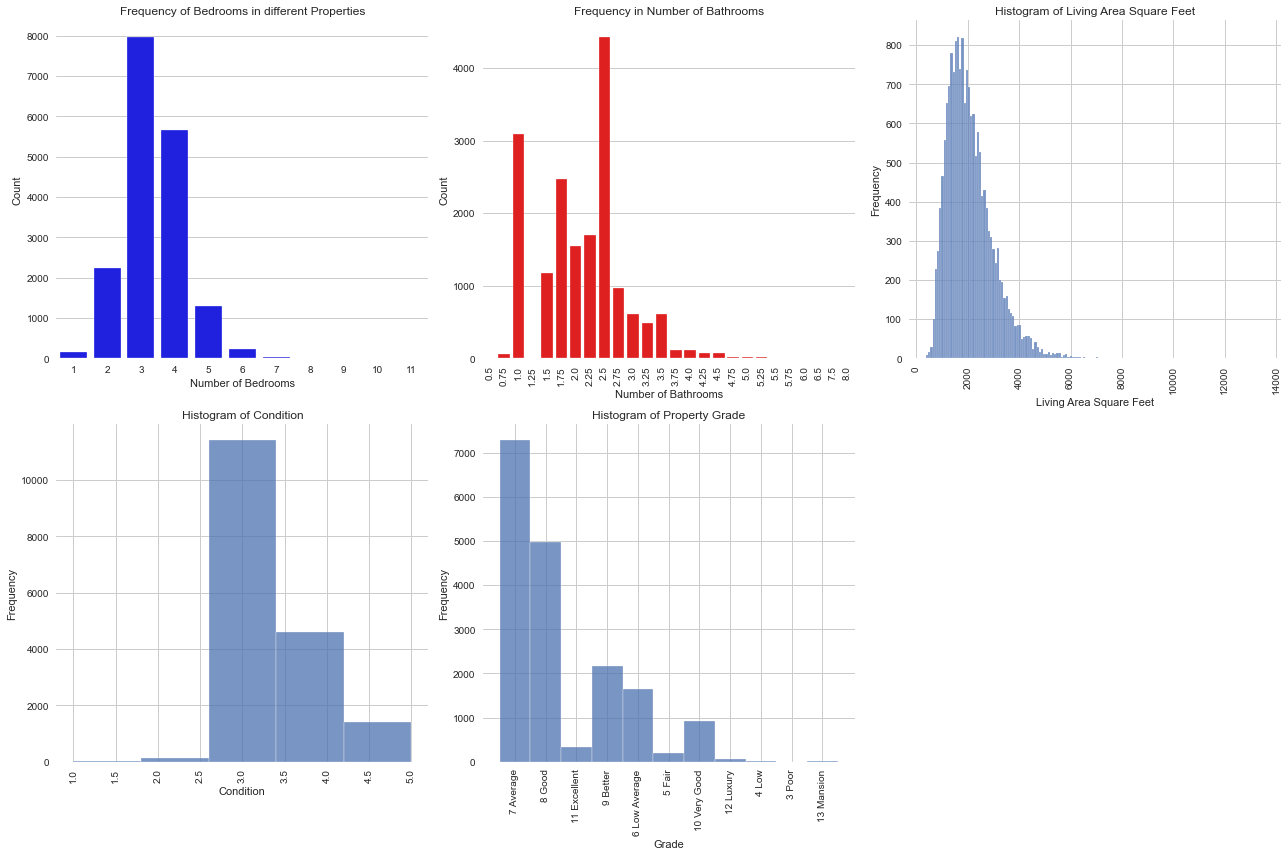

In [36]:
#subplot function to plot Frequency of bedrooms,bathrooms,sqft_living,condition,grade

fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Plot 1 - Frequency of Bedrooms
bedroom_counts = df_housing['bedrooms'].value_counts()
sns.barplot(x=bedroom_counts.index, y=bedroom_counts.values, color='blue', ax=axes[0, 0])
axes[0, 0].set_xlabel('Number of Bedrooms')
axes[0, 0].set_ylabel('Count')
axes[0, 0].set_title('Frequency of Bedrooms in different Properties')

# Plot 2 - Frequency of Bathrooms
bathrooms_counts = df_housing['bathrooms'].value_counts()
sns.barplot(x=bathrooms_counts.index, y=bathrooms_counts.values, color='red', ax=axes[0, 1])
axes[0, 1].set_xlabel('Number of Bathrooms')
axes[0, 1].set_ylabel('Count')
axes[0, 1].set_title('Frequency in Number of Bathrooms')
axes[0, 1].tick_params(axis='x', rotation=90)

# Plot 3 - Histogram of Living Area Square Feet
sns.histplot(data=df_housing, x='sqft_living', ax=axes[0, 2])
axes[0, 2].set_xlabel('Living Area Square Feet')
axes[0, 2].set_ylabel('Frequency')
axes[0, 2].set_title('Histogram of Living Area Square Feet')
axes[0, 2].tick_params(axis='x', rotation=90)

# Plot 4 - Histogram of Condition
sns.histplot(data=df_housing, x='condition', bins=5, ax=axes[1, 0])
axes[1, 0].set_xlabel('Condition')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Histogram of Condition')
axes[1, 0].tick_params(axis='x', rotation=90)

# Plot 5 - Histogram of Property Grade
sns.histplot(data=df_housing, x='grade', ax=axes[1, 1])
axes[1, 1].set_xlabel('Grade')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('Histogram of Property Grade')
axes[1, 1].tick_params(axis='x', rotation=90)

# Remove empty subplot
fig.delaxes(axes[1, 2])

plt.tight_layout()
plt.show()


### BIVARIATE ANALYSIS


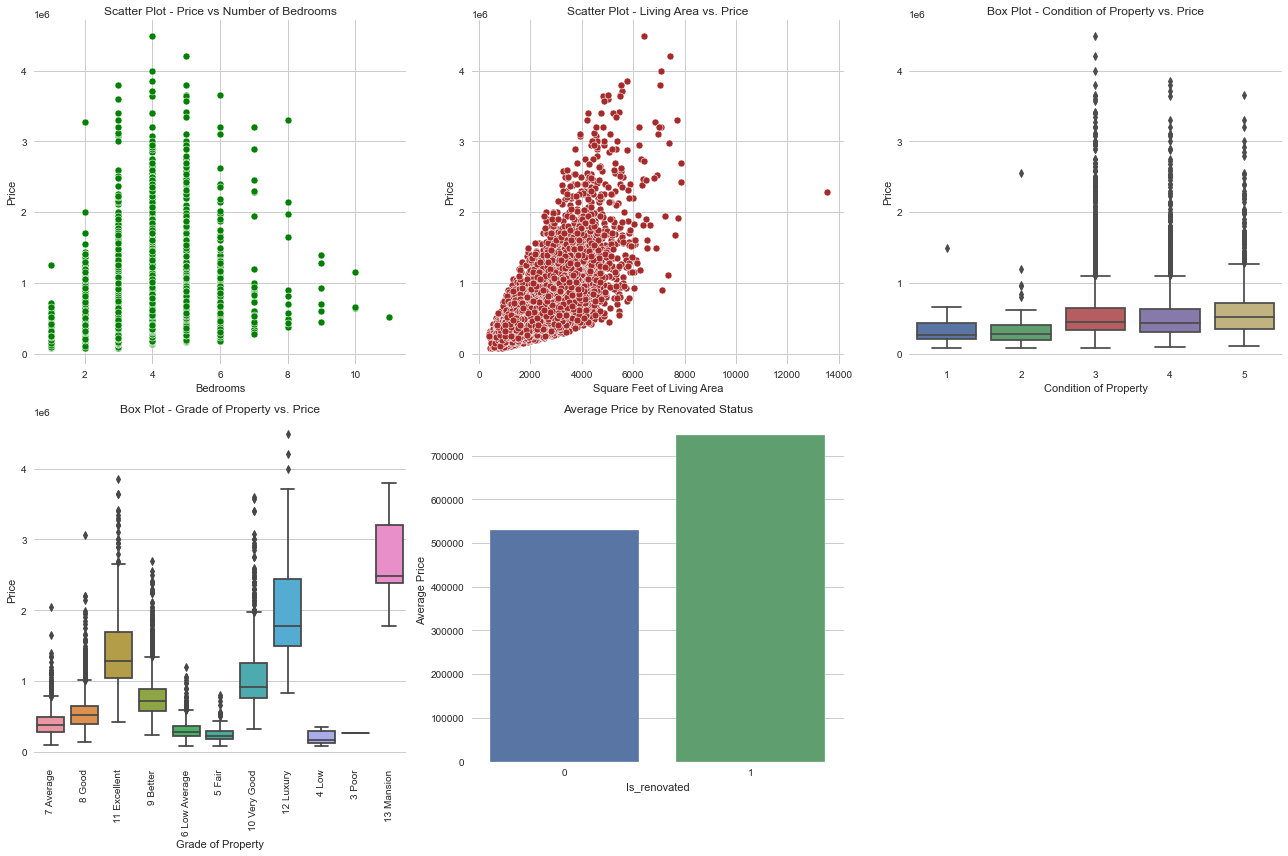

In [37]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Scatter plot: Price vs Number of Bedrooms
sns.scatterplot(data=df_housing, x='bedrooms', y='price', color='green', ax=axes[0, 0])
axes[0, 0].set_xlabel('Bedrooms')
axes[0, 0].set_ylabel('Price')
axes[0, 0].set_title('Scatter Plot - Price vs Number of Bedrooms')

# Scatter plot: Living Area vs Price
sns.scatterplot(data=df_housing, x='sqft_living', y='price', color='brown', ax=axes[0, 1])
axes[0, 1].set_xlabel('Square Feet of Living Area')
axes[0, 1].set_ylabel('Price')
axes[0, 1].set_title('Scatter Plot - Living Area vs. Price')

# Box plot: Condition of Property vs Price
sns.boxplot(data=df_housing, x='condition', y='price', ax=axes[0, 2])
axes[0, 2].set_xlabel('Condition of Property')
axes[0, 2].set_ylabel('Price')
axes[0, 2].set_title('Box Plot - Condition of Property vs. Price')

# Box plot: Grade of Property vs Price
sns.boxplot(data=df_housing, x='grade', y='price', ax=axes[1, 0])
axes[1, 0].set_xlabel('Grade of Property')
axes[1, 0].set_ylabel('Price')
axes[1, 0].set_title('Box Plot - Grade of Property vs. Price')
axes[1, 0].tick_params(axis='x', rotation=90)

# Bar plot: Average Price by Renovated Status
renovated_avg_price = df_housing.groupby('is_renovated')['price'].mean()
sns.barplot(x=renovated_avg_price.index, y=renovated_avg_price.values, ax=axes[1, 1])
axes[1, 1].set_xlabel('Is_renovated')
axes[1, 1].set_ylabel('Average Price')
axes[1, 1].set_title('Average Price by Renovated Status')

# Remove empty subplot
fig.delaxes(axes[1, 2])

plt.tight_layout()
plt.show()

#### Summary of Bivariate Analysis

The provided analysis indicates a clear linear correlation between the price (target variable) and several independent variables.

The independent variables considered in this analysis are as follows:
- Number of bedrooms
- Living area space
- Square footage of living space (sqft_living)
- Property grade
- Renovation status

Relationship between Bedrooms and Price: A positive linear relationship is evident, indicating that houses with more bedrooms tend to be more expensive. However, after reaching 7 bedrooms, the price starts to decrease.

Relationship between Living Area Space and Price: The cost of a house generally increases with a larger living area. However, there are instances where houses with large living spaces are priced lower, which could be influenced by other factors.

Relationship between Condition and Price: The condition of a house affects its pricing. Houses in average to very good condition tend to have higher prices.

Relationship between Grade and Price: A positive linear relationship exists between the grade of a property and its price. This is particularly noticeable for poorly and low-graded houses, which typically have lower prices.

Relationship between Renovation and Price: There is a positive correlation between houses that have been renovated and higher prices.

A house that possesses most of the above variables will command a higher price in the market, while houses with weaker performance in these variables will be comparatively cheaper.

## Multicollinearity of Features 

In this section, we check our independent variables for high multicollinearity and drop the columns in order to reduce the possibility of redundancy in our model. 
We can visualise the correlation using a heatmap and also calculate it. 

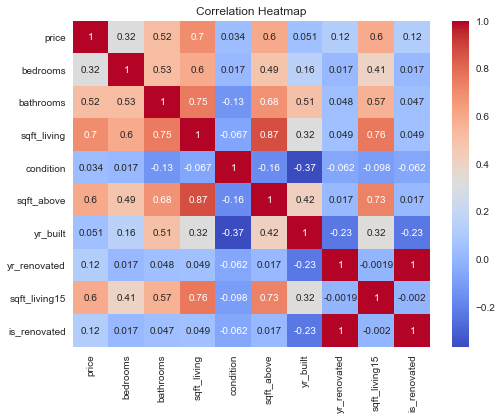

In [38]:
#create a heatmap of our features
plt.figure(figsize=(8, 6))
sns.heatmap(df_housing.corr(), cmap='coolwarm', annot=True, cbar=True)
plt.title('Correlation Heatmap')
plt.show()

In [39]:
#show features with high related variables
df_housing.corr()

,price,bedrooms,bathrooms,sqft_living,condition,sqft_above,yr_built,yr_renovated,sqft_living15,is_renovated
price,1.00,0.32,0.52,0.70,0.03,0.60,0.05,0.12,0.60,0.12
bedrooms,0.32,1.00,0.53,0.60,0.02,0.49,0.16,0.02,0.41,0.02
bathrooms,0.52,0.53,1.00,0.75,-0.13,0.68,0.51,0.05,0.57,0.05
sqft_living,0.70,0.60,0.75,1.00,-0.07,0.87,0.32,0.05,0.76,0.05
condition,0.03,0.02,-0.13,-0.07,1.00,-0.16,-0.37,-0.06,-0.10,-0.06
sqft_above,0.60,0.49,0.68,0.87,-0.16,1.00,0.42,0.02,0.73,0.02
yr_built,0.05,0.16,0.51,0.32,-0.37,0.42,1.00,-0.23,0.32,-0.23
yr_renovated,0.12,0.02,0.05,0.05,-0.06,0.02,-0.23,1.00,-0.00,1.00
sqft_living15,0.60,0.41,0.57,0.76,-0.10,0.73,0.32,-0.00,1.00,-0.00
is_renovated,0.12,0.02,0.05,0.05,-0.06,0.02,-0.23,1.00,-0.00,1.00


In [40]:
# Calculate correlation matrix

corr_matrix = df_housing.corr()

# Filter variables with correlation of 0.7 or higher
high_corr_vars = corr_matrix[corr_matrix >= 0.8]

# Remove duplicate correlations (only keep lower triangular)
high_corr_vars = high_corr_vars.mask(np.triu(np.ones(high_corr_vars.shape)).astype(bool))

# Get the list of variables with high correlation
high_corr_variables = high_corr_vars.stack().index.tolist()

# Print the list of variables
high_corr_variables

[('sqft_above', 'sqft_living'), ('is_renovated', 'yr_renovated')]

* From the above calculations, we have 4 features with over 80% correlation between themselves in our dataset.
* The columns are 'sqft_above', 'sqft_living', 'is_renovated', 'yr_renovated'.

* We decide to drop columns 'sqft_above' and 'yr_renovated' and maintain their corresponding features. 

In [41]:
# Columns to drop
columns_to_drop2 = ['sqft_above','yr_renovated']

# Drop columns to avoid multilinearity
df_housing = df_housing.drop(columns=columns_to_drop2)

In [42]:
print(df_housing.shape)

(17607, 10)


In [43]:
#view new dataframe
df_housing.head()

,date,price,bedrooms,bathrooms,sqft_living,condition,grade,yr_built,sqft_living15,is_renovated
0,2014-10-13,221900.00,3,1.00,1180,3,7 Average,1955,1340,0
1,2014-12-09,538000.00,3,2.25,2570,3,7 Average,1951,1690,1
3,2014-12-09,604000.00,4,3.00,1960,5,7 Average,1965,1360,0
4,2015-02-18,510000.00,3,2.00,1680,3,8 Good,1987,1800,0
5,2014-05-12,1230000.00,4,4.50,5420,3,11 Excellent,2001,4760,0


* It should be noted, we are currently working with 10 features and not 12 unlike before. 
* The number of rows has remained at 17608 entries.

## Model Creation : Linear Regression

### Simple Linear Regression

#### Model 1: Creating a Baseline

We require to create a baseline in which our regression model will be evaluated against. 
Considering we are working with multiple linear regression, a simple linear regression will be our baseline.

Sqft_living is the feature which has the highest correlation . 

Where $\hat{y}$ is `price`, the dependent (endogenous) variable, and $x$ is `sqft_living`, the independent (exogenous) variable.


In [44]:
df_housing.corr()['price']

price           1.00
bedrooms        0.32
bathrooms       0.52
sqft_living     0.70
condition       0.03
yr_built        0.05
sqft_living15   0.60
is_renovated    0.12
Name: price, dtype: float64

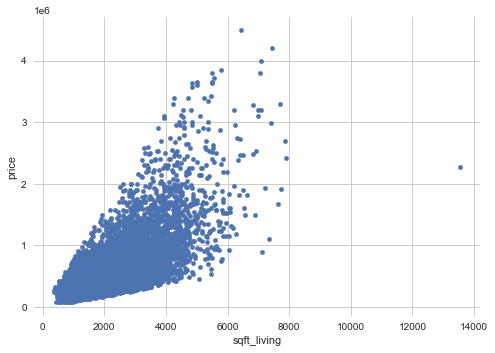

In [45]:
#plot a scatterplot of sqft_living and price
df_housing.plot.scatter(x = 'sqft_living', y= 'price');

In [46]:
#define x and y
y = df_housing['price']
X_baseline = df_housing[['sqft_living']]

In [47]:
#create baseline model
#baseline_model = sm.OLS(y, X_baseline_standardized)
baseline_model = sm.OLS(y, sm.add_constant(X_baseline))
baseline_results = baseline_model.fit()

print(baseline_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.485
Method:                 Least Squares   F-statistic:                 1.658e+04
Date:                Fri, 02 Jun 2023   Prob (F-statistic):               0.00
Time:                        17:35:08   Log-Likelihood:            -2.4398e+05
No. Observations:               17607   AIC:                         4.880e+05
Df Residuals:                   17605   BIC:                         4.880e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -2.425e+04   4767.056     -5.086      

#### Model 1: Simple Linear Regression Results

Looking at the summary above, the regression line we foundis

$$ \hat{price} = -24,220 + 270.16 sqftliving $$

* Our y intercept in Model 1 is -24,220.
* The model is statistically significant, with an F-statistic p-value well below 0.05
* The model (R-squared) explains about 48.5% of the variance in price.
* The model coefficients (`const` and `sqft_living`) are both statistically significant, with t-statistic p-values well below 0.05
* If a house has sqft_living space of  0 feet squared, we would expect the price to be about USD -24,220
* For each increase of 1 square foot in sqft_living space, the price increases by USD 270.16

##### Plotting the actual vs. Predicted Values:

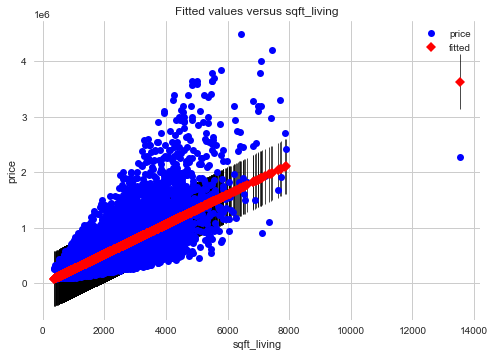

In [48]:
#create a 3D plot to show the plane the model represents
sm.graphics.plot_fit(baseline_results, 'sqft_living')
plt.show()

This shows the true (blue) vs. predicted (red) values, with the particular predictor (in this case, sqft_living) along the x-axis.

##### Plotting the regression line


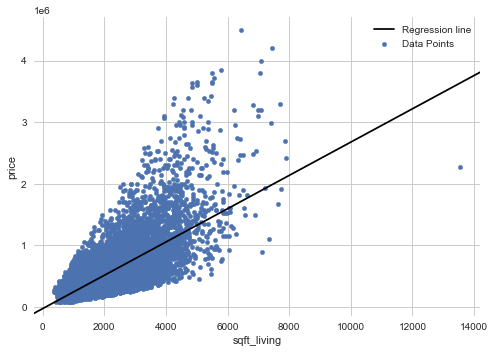

In [49]:
fig, ax = plt.subplots()
df_housing.plot.scatter(x='sqft_living', y='price', label ='Data Points', ax=ax)
sm.graphics.abline_plot(model_results=baseline_results, label= 'Regression line', ax=ax, color='black')
ax.legend();

##### Plotting the residuals

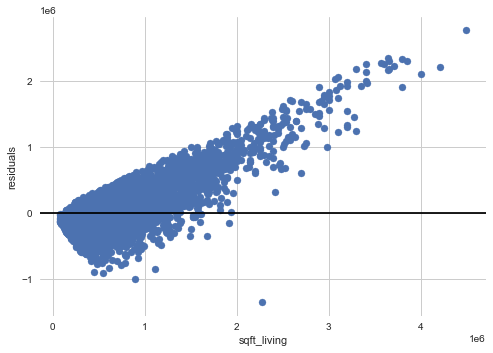

In [50]:
fig, ax = plt.subplots()

ax.scatter(df_housing["price"], baseline_results.resid)
ax.axhline(y=0, color="black")
ax.set_xlabel("sqft_living")
ax.set_ylabel("residuals");

### Multiple linear regression

### Model 2: Columns with correlation >50% with 'price'

In [51]:
#confirm correlation
df_housing[['bathrooms', 'sqft_living', 'sqft_living15', 'price']].corr()['price']

bathrooms       0.52
sqft_living     0.70
sqft_living15   0.60
price           1.00
Name: price, dtype: float64

In [52]:
#create X variable containing multiple columns with correlation above 0.50.
X_second = df_housing[['bathrooms', 'sqft_living','sqft_living15']]
X_second

,bathrooms,sqft_living,sqft_living15
0,1.00,1180,1340
1,2.25,2570,1690
3,3.00,1960,1360
4,2.00,1680,1800
5,4.50,5420,4760
...,...,...,...
21592,2.50,1530,1530
21593,2.50,2310,1830
21594,0.75,1020,1020
21595,2.50,1600,1410


In [53]:
#create multiple linear model
second_model = sm.OLS(y,sm.add_constant(X_second))
second_results = second_model.fit()

print(second_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.495
Model:                            OLS   Adj. R-squared:                  0.495
Method:                 Least Squares   F-statistic:                     5760.
Date:                Fri, 02 Jun 2023   Prob (F-statistic):               0.00
Time:                        17:35:11   Log-Likelihood:            -2.4380e+05
No. Observations:               17607   AIC:                         4.876e+05
Df Residuals:                   17603   BIC:                         4.876e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -8.744e+04   6539.196    -13.371

#### Model 2 Results:
    The second Model built illustrates price as below:

$$ \hat{price} = -87,440 - 1089.08bathrooms + 224.61 squarefootliving + 80.55 sqftliving15 $$

* Our y intercept in this model  is -87,440
* The model is statistically significant overall, with an F-statistic p-value well below 0.05
* The model explains approximately 49.5% of the variability in the dependent variable (price) 
* This is a 1% increase from our baseline model and thus may not have much of a difference.
* The model coefficients (`const`,`sqft_living`and `sqft_living15`) are all statistically significant, with t-statistic p-values way below 0.05.
* However, the bathroom coefficient is not statistically significant. We can thus drop it for our next model.
* On average, each additional square foot of living area is associated with an increase of approximately USD224.61 in the price.
* This is a decrease of approximately 45 dollars from the baseline model. This may mean that the additional varibles  have significance in the relationship between sqft_living and price.
* For each increase of 1 square foot living15 in a house , there is an associated price increase of USD 80.58

The Partial regression plot displays the data above and is consistent with the model findings.

Overall, this regression model suggests that the number of bathrooms has no significant effect on the price, while the square footage of the living area and the square footage of the neighboring properties' living area have significant positive effects on the price.

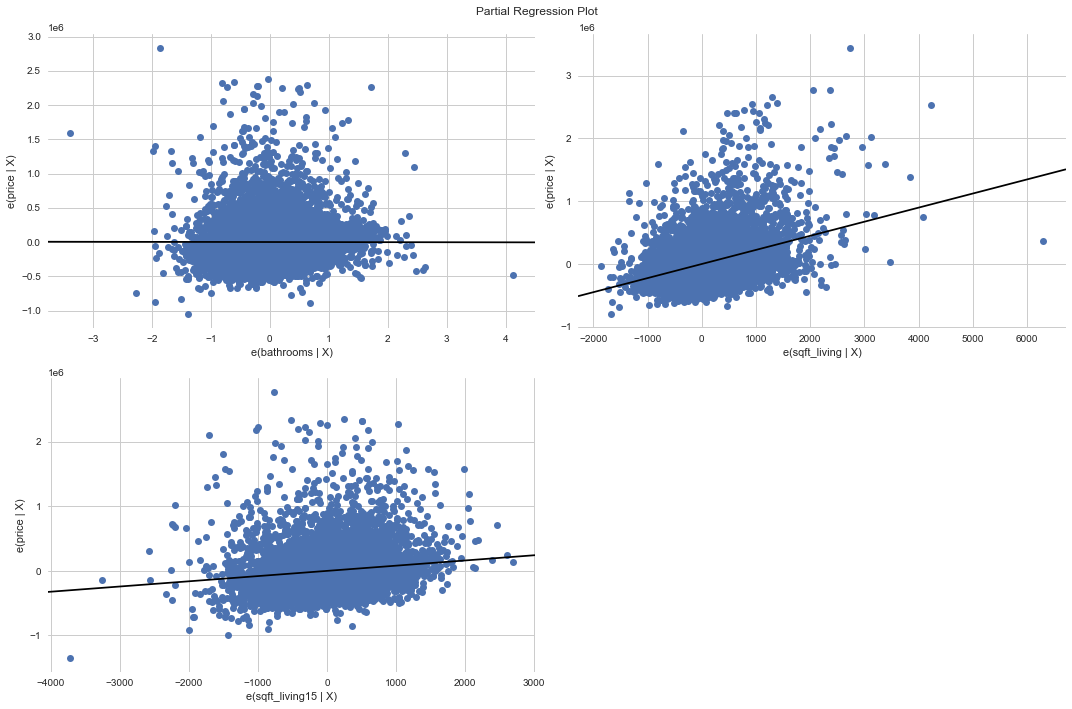

In [54]:
fig = plt.figure(figsize=(15,10))
sm.graphics.plot_partregress_grid(second_results, exog_idx=['bathrooms','sqft_living','sqft_living15'], fig=fig)
plt.tight_layout()
plt.show()


### Model 3: All  correlated columns minus bathrooms
We create a multiple linear regression by utilising all columns with the positively correlated predictors. 

We will exclude Bathrooms from this model as it is not statistically significant as per model 2.


In [55]:
df_housing.corr()['price']

price           1.00
bedrooms        0.32
bathrooms       0.52
sqft_living     0.70
condition       0.03
yr_built        0.05
sqft_living15   0.60
is_renovated    0.12
Name: price, dtype: float64

In [56]:
#create X variable containing multiple columns.
X_third = df_housing[['bedrooms', 'sqft_living', 'condition', 'yr_built','is_renovated','sqft_living15']]
X_third

,bedrooms,sqft_living,condition,yr_built,is_renovated,sqft_living15
0,3,1180,3,1955,0,1340
1,3,2570,3,1951,1,1690
3,4,1960,5,1965,0,1360
4,3,1680,3,1987,0,1800
5,4,5420,3,2001,0,4760
...,...,...,...,...,...,...
21592,3,1530,3,2009,0,1530
21593,4,2310,3,2014,0,1830
21594,2,1020,3,2009,0,1020
21595,3,1600,3,2004,0,1410


In [57]:
#create multiple linear model
third_model = sm.OLS(y,sm.add_constant(X_third))
third_results = third_model.fit()

print(third_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.550
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     3592.
Date:                Fri, 02 Jun 2023   Prob (F-statistic):               0.00
Time:                        17:35:13   Log-Likelihood:            -2.4278e+05
No. Observations:               17607   AIC:                         4.856e+05
Df Residuals:                   17600   BIC:                         4.856e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          4.208e+06   1.45e+05     28.966

#### Model 3  Results:
The third Model built illustrates price as below:

$$ \hat{price} = 4,208,000 -57,350 bedrooms + 272.46 squarefootliving + 20,350 condition  - 2180.09 yrbuilt + 94,430 isrenovated +94.58 sqftliving15 $$

* Our y intercept in this model  is 4,208,000
* The model is statistically significant with an F-statistic p-value well below 0.05
* The model explains approximately 55% of the variability in the dependent variable (price)
* The model coefficients (`const`,`bedrooms`,`sqft_living`,`condition`,`yr_built`,`is_renovated`and`sqft_living15` are all statistically significant, with t-statistic p-values well below 0.05.
* 0n average, each additional bedroom is associated with a decrease of approximately USD 57,350 in the price.
* For each additional square foot of living area is associated with an increase of approximately USD272.46 in the price.
* This is a decrease of USD 2.3 from our baseline model and an increase of USD 48 from our second model.
* On average, each unit increase in condition is associated with an increase of approximately USD20,350 in the price.
* The yr_built on the other hand has an associated decrease in price the older the house becomes by approximately USD 2184
* A renovated property increases the price by USD 94,300
* On average, each additional square foot of the neighboring properties' living area is associated with an increase of approximately USD 94.59 in the price.

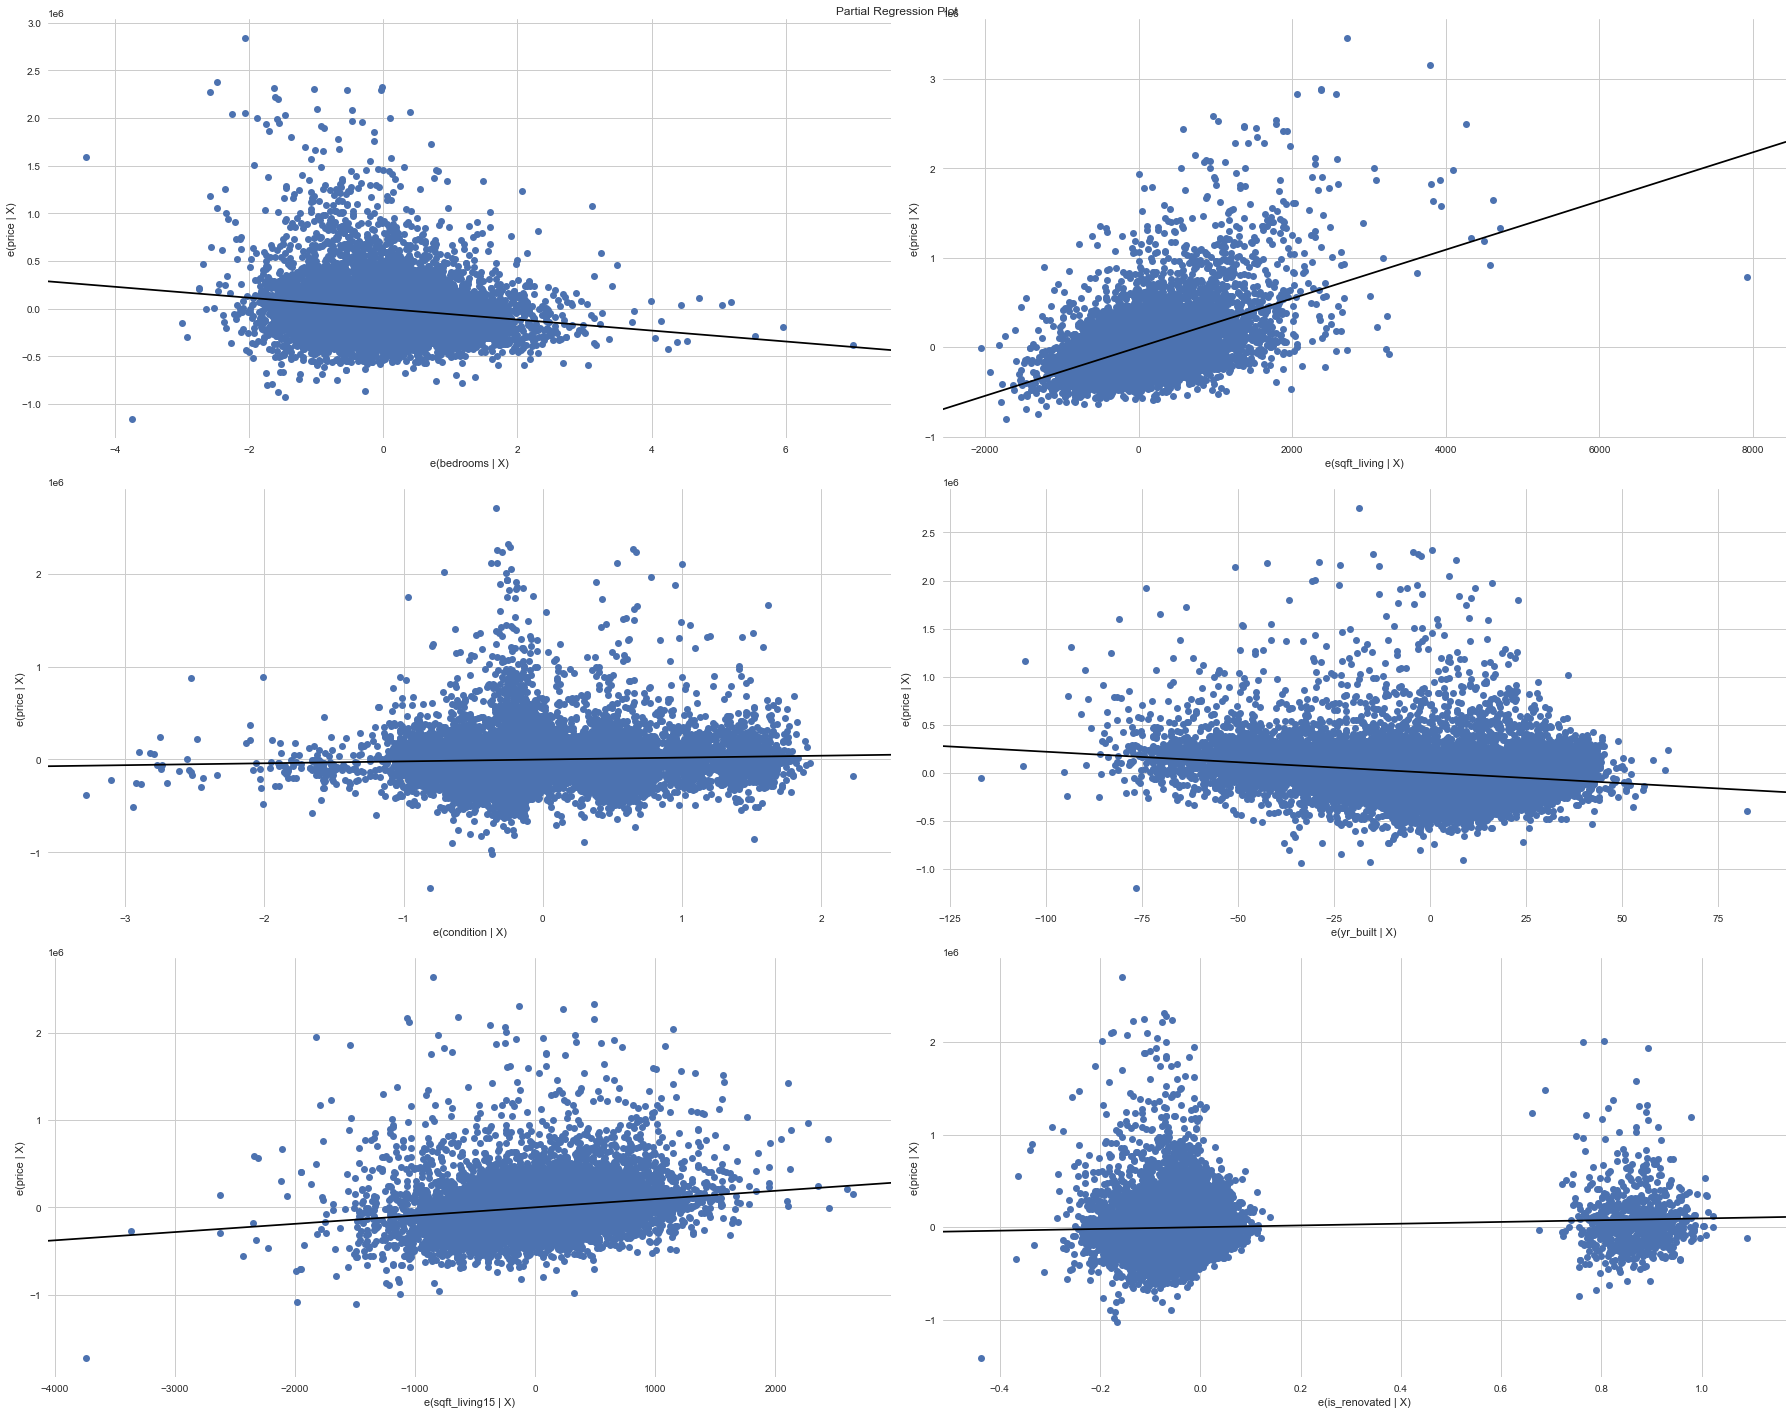

In [58]:
fig = plt.figure(figsize=(25,20))
sm.graphics.plot_partregress_grid(third_results, exog_idx=['bedrooms','sqft_living','condition','yr_built','sqft_living15','is_renovated'], fig=fig)
plt.tight_layout()
plt.show()

#### Plotting residuals

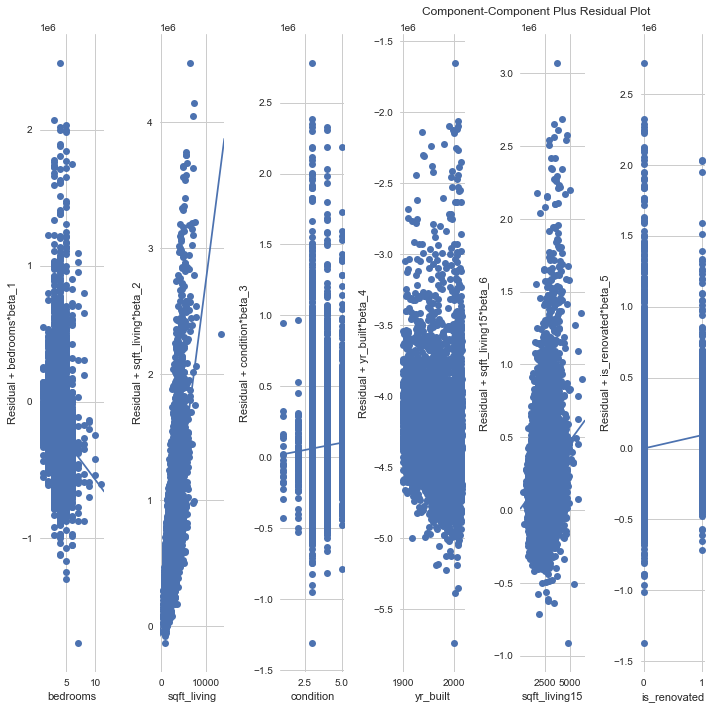

In [59]:
#plotting ccpr plot with  a non Zero slopebase
fig = plt.figure(figsize=(15,10))
sm.graphics.plot_ccpr_grid(third_results, exog_idx=['bedrooms','sqft_living','condition','yr_built','sqft_living15','is_renovated'], grid=(1,9), fig=fig)
plt.tight_layout()
plt.show()

### Model 4: Log Transformed data
For this model,  we log transformed our data to improve our final model. 

In [60]:
X_fourth = df_housing[['bedrooms','sqft_living','condition','yr_built','sqft_living15','is_renovated']]
#We have Zeros in is_renovated thus the need for the below formula.
# Check for zero or negative values in X_fourth
if np.any(X_fourth <= 0):
    # Handle the zero or negative values by adding a small epsilon value
    epsilon = 1e-10  # A small positive value
    X_fourth = np.maximum(X_fourth, epsilon)

# # Take the logarithm of the updated X_fourth array
x_log = np.log(X_fourth)
x_log

,bedrooms,sqft_living,condition,yr_built,sqft_living15,is_renovated
0,1.10,7.07,1.10,7.58,7.20,-23.03
1,1.10,7.85,1.10,7.58,7.43,0.00
3,1.39,7.58,1.61,7.58,7.22,-23.03
4,1.10,7.43,1.10,7.59,7.50,-23.03
5,1.39,8.60,1.10,7.60,8.47,-23.03
...,...,...,...,...,...,...
21592,1.10,7.33,1.10,7.61,7.33,-23.03
21593,1.39,7.75,1.10,7.61,7.51,-23.03
21594,0.69,6.93,1.10,7.61,6.93,-23.03
21595,1.10,7.38,1.10,7.60,7.25,-23.03


In [61]:
#create multiple linear model
fourth_model = sm.OLS(y,sm.add_constant(x_log))
fourth_results = fourth_model.fit()

print(fourth_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.458
Model:                            OLS   Adj. R-squared:                  0.458
Method:                 Least Squares   F-statistic:                     2480.
Date:                Fri, 02 Jun 2023   Prob (F-statistic):               0.00
Time:                        17:35:20   Log-Likelihood:            -2.4443e+05
No. Observations:               17607   AIC:                         4.889e+05
Df Residuals:                   17600   BIC:                         4.889e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           2.81e+07   1.17e+06     23.979

#### Model 4  Results:
The log transfromed variables do not improve the fit of the model compared to model 3. 

This can be attributed to the Zeros in 'is_renovated' column which needed to be added a small epsilon value.
The third Model built illustrates price as below:

$$ \hat{price} =  28,100,000 -201,600 bedrooms + 515,700 squarefootliving + 54,660 condition  - 4,351,000 yrbuilt + 4313isrenovated +240,800 sqftliving15 $$

* Our y intercept in this model  is  $28,100,000
* The model is statistically significant with an F-statistic p-value well below 0.05
* The model explains approximately 45.8% of the variability in the dependent variable (price)
* The model coefficients are all statistically significant, with t-statistic p-values well below 0.05.

## Model Evaluation : Error Based Metric 

While R-Squared is a relative metric that compares the variance explained by the model to the variance explained by an intercept-only "baseline" model, error-based metrics are absolute metrics that describe some form of average error.

They Measure the performance of the model in terms of the residuals using  various techiniques to aggregate and summarize them.
For this study we utilise the Mean Absolute Error.

We also visualise our data using Q-Q plots inorder to assess whether a dataset follows a particular theoretical distribution, such as the normal distribution. It compares the quantiles of the observed data with the quantiles expected from the theoretical distribution. If the data points fall approximately along a straight line, it suggests that the data follows the expected distribution.


In [62]:
#calculate the Mean Absolute Error
from sklearn.metrics import mean_absolute_error
baseline_mae1 = mean_absolute_error(y, baseline_results.predict(sm.add_constant(X_baseline)))
second_mae2 = mean_absolute_error(y, second_results.predict(sm.add_constant(X_second)))
third_mae3 = mean_absolute_error(y, third_results.predict(sm.add_constant(X_third)))
fourth_mae4 = mean_absolute_error(y, fourth_results.predict(sm.add_constant(X_fourth)))

print(f'Baseline MAE: {baseline_mae1}')
print(f'Second MAE: {second_mae2}')
print(f'Third MAE: {third_mae3}')
print(f'fourth MAE: {fourth_mae4}')

Baseline MAE: 170665.80621755886
Second MAE: 169543.59353953108
Third MAE: 158420.6801816099
fourth MAE: 6995294140.310779


#### Interpretation of the MAE results  

* Absolute error is a measure of the difference between the predicted values and the actual values in a regression model. 
* It represents the magnitude of the deviation between the predicted and actual values, without considering the direction of the deviation.

* In the first three models  (170,665.8062, 169,543.5935, and 158,420.6802), the absolute errors are relatively small, indicating that the predictions of the model were relatively close to the actual values. 

* The smaller the absolute error, the better the model's predictions align with the actual data.

* However, the fourth absolute error (6,995,294,140.3108) is exceptionally large compared to the others. 
* This suggests a significant discrepancy indicating that the model's prediction for that particular instance was highly inaccurate.

To conclude, the third model with the lowest absolute error of approximately 158,420 is the preferred choice.  
This model will result in better overall accuracy and performance. 

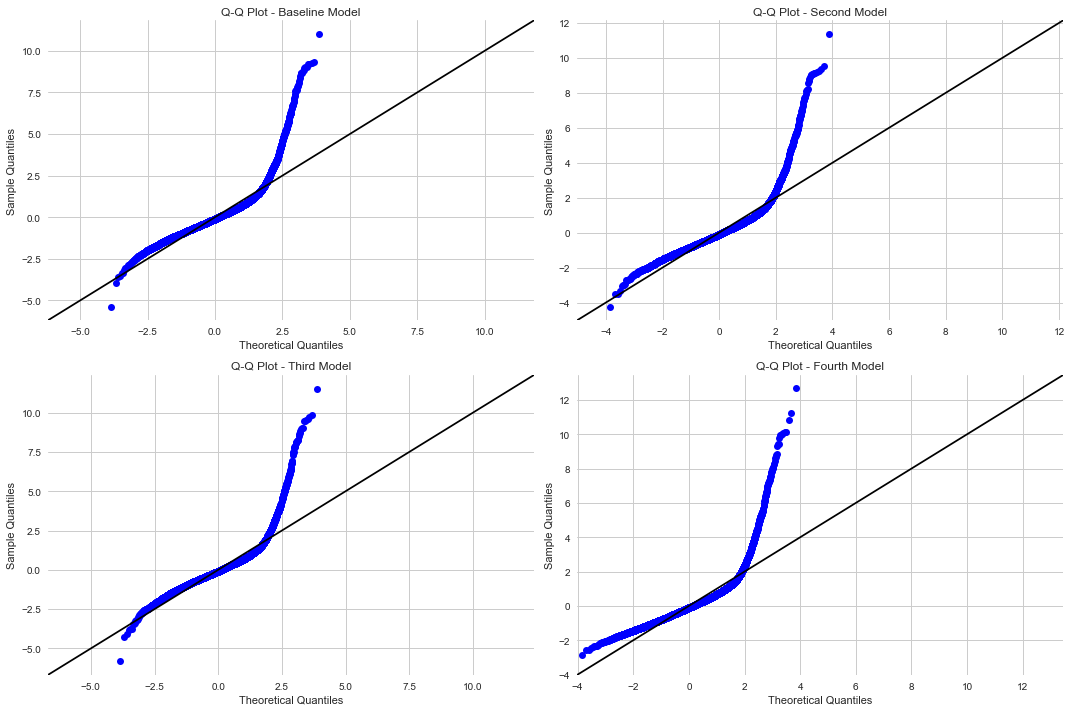

In [63]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Baseline Model
ax1 = axes[0, 0]
sm.graphics.qqplot(baseline_results.resid, dist=stats.norm, line='45', fit=True, ax=ax1)
line1 = ax1.lines[1]
line1.set_color('black')
ax1.set_title('Q-Q Plot - Baseline Model')

# Second Model
ax2 = axes[0, 1]
sm.graphics.qqplot(second_results.resid, dist=stats.norm, line='45', fit=True, ax=ax2)
line2 = ax2.lines[1]
line2.set_color('black')
ax2.set_title('Q-Q Plot - Second Model')

# Third Model
ax3 = axes[1, 0]
sm.graphics.qqplot(third_results.resid, dist=stats.norm, line='45', fit=True, ax=ax3)
line3 = ax3.lines[1]
line3.set_color('black')
ax3.set_title('Q-Q Plot - Third Model')

# Fourth Model
ax4 = axes[1, 1]
sm.graphics.qqplot(fourth_results.resid, dist=stats.norm, line='45', fit=True, ax=ax4)
line4 = ax4.lines[1]
line4.set_color('black')
ax4.set_title('Q-Q Plot - Fourth Model')

plt.tight_layout()
plt.show()


### Choosen Model: Model 3
After evaluating the 4 models created, we settled on the Model 3 because :

1. With the highest R-squared value of 55%, our third Model outperforms the other models in explaining the majority of the variability in price. This indicates a better fit for the data while avoiding overfitting.

2. Model 3 exhibits the lowest Mean Absolute Error, approximately 158,420. This implies that the predictions made by this model have the smallest overall deviation from the actual values, regardless of the direction of the deviation. It thus demonstartes better accuracy and performance.

3. Model 3 incorporates the most features from the dataframe, with only one feature being deemed statistically insignificant and excluded from the model. This suggests that Model 3 takes into account a comprehensive set of variables, potentially capturing more nuances and improving the predictive accuracy.

## Conclusion

The following conclusions were drawn from this project and in the process answering the 3 business problems stated earlier



**To determine Property Valuation by considering the impact of various property attributes**

**To evaluate potential real estate investment opportunities thus assessing profitability and potential ROI**

1. The model shows a moderate level of predictive power.
The R-squared value of 0.550 indicates that the independent variables included in the model can explain approximately 55% of the variability in home prices. This suggests that the selected features have some influence on the pricing of homes.

The below is the property valuation model:
$$ \hat{price} = 4,208,000 -57,350 bedrooms + 272.46 squarefootliving + 20,350 condition  - 2180.09 yrbuilt + 94,430 isrenovated +94.58 sqftliving15 $$


**To identify the most influential features in determining property prices**

2. Significant predictors of price as per the model are the number of bedrooms, square footage of living area, condition of house, year built, whether the property has been renovated, and the square footage of neighboring properties. These variables demonstrate a significant association with the dependent variable, indicating their importance in determining the price of a home.

3. Normality assumption: The Q-Q plots of the model's residuals suggest that they approximately follow a normal distribution. This indicates that the assumption of normality is reasonably met, which is important for the validity of the statistical inference and interpretation of the model results.

In summary, the study suggests that the number of bedrooms, square footage, condition, year built, renovations, and neighboring property characteristics are important factors to consider when determining the price of a home. However, it is essential to consider other market factors and property-specific attributes in conjunction with the findings of this analysis to arrive at an accurate and competitive listing price for example availability of different ammenities such as schools, shoppinhg malls, hospitals, factories etc.

## Recommendations
#### Recommendations to Homeowners 
Based on the findings from the regression analysis, the following recommendations can be made to homeowners:

1. Consider the number of bedrooms: The coefficient for the "bedrooms" variable is negative, indicating that an increase in the number of bedrooms may have a negative impact on the house price. Homeowners should carefully evaluate their needs and the market demand for different bedroom configurations when making decisions about the number of bedrooms in their homes.

2. Focus on the square footage: The coefficient for "sqft_living" suggests that an increase in square footage positively influences the house price. Homeowners should consider investing in home improvements or expansions that increase the living space, as it may have a positive impact on the value of their property.

3. Maintain the condition of the property: The coefficient for the "condition" variable indicates that a higher condition rating positively affects the house price. Homeowners should prioritize regular maintenance and repairs to keep their homes in good condition, which can potentially enhance the market value.

4. Pay attention to the year built: The coefficient for "yr_built" suggests that older homes may have a negative impact on the price. Homeowners of older properties could consider renovations or updates to modernize their homes and potentially increase their market value.

5. Renovations can add value: The coefficient for the "is_renovated" variable indicates that homes that have been renovated have a positive impact on the price. Homeowners who are considering renovations should carefully plan and budget for these improvements, as they can potentially yield a higher return on investment.

6. Consider the influence of neighboring properties: The coefficient for "sqft_living15" suggests that the square footage of nearby properties (within a certain radius) can influence the house price. Homeowners should be aware of the market trends and the characteristics of neighboring properties, as these factors can impact the value of their own homes.

Overall, homeowners should consider these factors but also consult with real estate professionals for a more comprehensive analysis tailored to their specific property and market conditions.

#### Recommendations to Members NAR
As members of the National Association of Realtors, real estate professionals play a crucial role in guiding their clients through the buying and selling process. Based on the findings from the regression analysis, here are some recommendations for members of the National Association of Realtors:

1. Stay updated on market trends: Continuously monitor and analyze market trends, including factors such as the number of bedrooms, square footage, property condition, year built, renovations, and neighboring property characteristics. This information will help you provide accurate and valuable insights to your clients.

2. Educate clients on the impact of features: Clearly explain to clients how various features of a property, such as the number of bedrooms, square footage, and condition, can influence its market value. Help them understand the potential trade-offs and considerations when making decisions about buying or selling a property.

3. Provide renovation recommendations: Offer guidance on renovations or updates that can enhance the value of a property. Advise clients on which improvements are most likely to yield a positive return on investment based on the findings from the regression analysis.

4. Conduct thorough market analyses: Before listing a property, perform a comprehensive market analysis that takes into account the local market conditions, recent sales data, and the specific features of the property. Use this information to set an appropriate listing price and advise clients on the potential selling price range.

5. Collaborate with appraisers: Work closely with professional appraisers to ensure accurate property valuations. Share the regression analysis findings with appraisers to provide additional insights and support the appraisal process.

6. Stay informed about regulations and policies: Stay updated on any regulatory changes or policies that may impact the real estate market. This knowledge will help you provide informed advice to your clients and navigate any legal or policy-related challenges.

By following these recommendations, members of the National Association of Realtors can provide valuable guidance to their clients, assist them in making informed decisions, and maintain professionalism and expertise in the real estate industry.